### Tarea 2
<div style="text-align: justify">
    Trabajo Realizado por:<br>
    <b>Julián Zúñiga Errázuriz</b> en conjunto con <b>Pia San Martin Correa</b>
</div><br>

In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
#Se importa el dataset del MinCiencia de Covid-19
datos = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [184]:
#Se observa si se importo bien el dataset con su respectivo separador.
datos.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,31735.0,12819.5
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,234.0,NaN


In [185]:
#Se obtienen los datos de la Comuna de Las condes que son los que se utilizaran.
datos_LC = datos[datos["Comuna"]== "Las Condes"]

In [186]:
#Se observa si se realizo el cambio
datos_LC.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06,Tasa
108,Metropolitana,13,Las Condes,13114.0,330759.0,181.0,208.0,224.0,258.0,266.0,...,21589.0,21754.0,21847.0,21967.0,22028.0,22122.0,22160.0,22193.0,22214.0,6716.1


In [187]:
#Se transformo las fechas en una sola columna en en conjunto con los contagiados por fecha.
datos_LC = datos_LC.melt(id_vars=["Region","Codigo region","Comuna","Codigo comuna",
                                   "Poblacion", "Tasa"], var_name="Fecha", value_name="Contagiados")

In [188]:
datos_LC.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Tasa,Fecha,Contagiados
0,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-03-30,181.0
1,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-01,208.0
2,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-03,224.0
3,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-06,258.0
4,Metropolitana,13,Las Condes,13114.0,330759.0,6716.1,2020-04-08,266.0


In [189]:
#Utilizando la función drop se retiran las columnas que no son relevantes para resolver el prblema.
datos_LC = datos_LC.drop(columns = ['Region',"Codigo region", "Tasa",
                                    "Poblacion", "Codigo comuna"])

In [190]:
#Se revisa el formato en que se guarda cada columna
datos_LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Comuna       179 non-null    object 
 1   Fecha        179 non-null    object 
 2   Contagiados  179 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


In [191]:
#Como se puedo ver anteriormente la fecha esta guardada como object por lo que se procede a convertirlo en formato datetime con el codigo a seguir.
datos_LC["Fecha"] = pd.to_datetime(datos_LC["Fecha"])

In [192]:
#Se confiurma que efectivamente se realizo el cambio.
datos_LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Comuna       179 non-null    object        
 1   Fecha        179 non-null    datetime64[ns]
 2   Contagiados  179 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.3+ KB


In [193]:
#Como en el problema se requiere que las fechas se agrupen por semana se utiliza la función resample la cual suma los ontagiados dentro del periodo de una semana en donde se considera que el inicio de semana es el Lunes.
datos_LC = datos_LC.resample("W-Mon", on="Fecha").sum().sort_values(by="Fecha")

In [194]:
#Se confirma si realmente se realizaron los cambios.
datos_LC.head()

,Contagiados
Fecha,
2020-03-30,181.0
2020-04-06,690.0
2020-04-13,843.0
2020-04-20,952.0
2020-04-27,701.0


In [173]:
#Como los datos se suman de manera acumulativa se porcede a restar los contagiados con la semana anterior en una nueva columna llamada Contagiodos_Semana
datos_LC["Contagiados_Semana"] = datos_LC["Contagiados"] - datos_LC["Contagiados"].shift()

In [174]:
datos_LC.head()

,Contagiados,Contagiados_Semana
Fecha,,
2020-03-30,181.0,NaN
2020-04-06,690.0,509.0
2020-04-13,843.0,153.0
2020-04-20,952.0,109.0
2020-04-27,701.0,-251.0


In [175]:
#Para realizar el boxplot se le agrega una columna que contiene el dato de la Comuna la cual es Las Condes
datos_LC["Comuna"] = "Las Condes"

In [176]:
#Se confirma que se realizo el cambio.
datos_LC.head()

,Contagiados,Contagiados_Semana,Comuna
Fecha,,,
2020-03-30,181.0,NaN,Las Condes
2020-04-06,690.0,509.0,Las Condes
2020-04-13,843.0,153.0,Las Condes
2020-04-20,952.0,109.0,Las Condes
2020-04-27,701.0,-251.0,Las Condes


In [177]:
#Como existen caso en donde los valores son negativos y dado que en este caso no tienen sentido para el problema
datos_LC = datos_LC[datos_LC['Contagiados_Semana'] > 0]

(0.0, 5100.0)

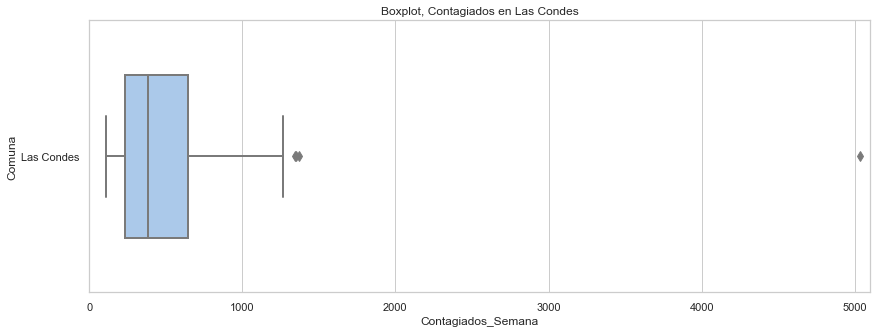

In [178]:
#Se procede a realizar el boxplot de la manera mas amigable visualmente y poder identificar los outliers.
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(14, 5))
sns.boxplot( x=datos_LC["Contagiados_Semana"], y=datos_LC["Comuna"], palette = "pastel",
            linewidth=2, fliersize=7, width=0.6)
plt.title('Boxplot, Contagiados en Las Condes')
plt.xlim(0,5100)

Text(0.5, 1.0, 'Casos en Las Condes')

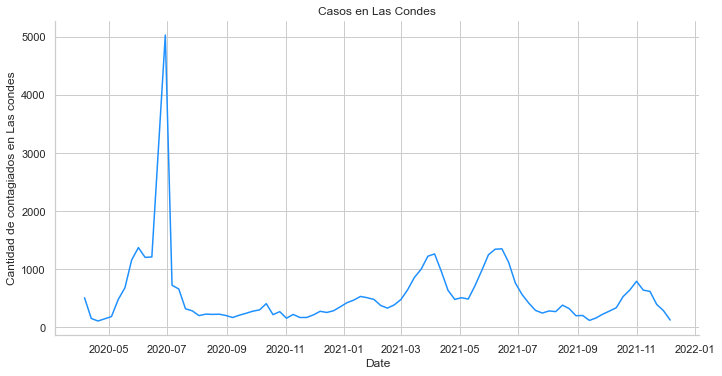

In [179]:
#Se realiza de manera grafica para poder apreciar como se distribuye.
sns.relplot(data = datos_LC, x = "Fecha", y ='Contagiados_Semana', 
            height=5, aspect=2, color="dodgerblue",
            kind="line").set_axis_labels('Date', 'Cantidad de contagiados en Las condes')
plt.title('Casos en Las Condes')

In [180]:
#Viendo el boxplot se confirma que los outliers se encuentran sobre los 1300 contagios aproximadamente por lo que se crea una lista con los semanas que presentan una cantidad de contagios superior a 1300.
Lista_Outliers= datos_LC[datos_LC['Contagiados_Semana'] > 1300]

In [158]:
#Se observa cuales son las semanas donde se identificaron los outliers obteneindo que la mayor fue una semana en que se consideraron 5.033 contagios siendo muy por encima de lo habitual.
Lista_Outliers

,Contagiados,Contagiados_Semana,Comuna
Fecha,,,
2020-06-01,4577.0,1373.0,Las Condes
2020-06-29,9225.0,5033.0,Las Condes
2021-06-07,32837.0,1345.0,Las Condes
2021-06-14,34189.0,1352.0,Las Condes
